<a href="https://colab.research.google.com/github/baluvanan/CNN_projects/blob/development/Transfer_learning_dog_cat_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

--2021-02-13 13:22:23--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   122MB/s    in 0.7s    

2021-02-13 13:22:23 (122 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
from tensorflow.keras.optimizers import RMSprop
x = last_output
x = layers.Conv2D(128,(3,3), activation="relu",padding='same')(x)
#x = layers.Activation(activation=)(x)
x = layers.MaxPool2D((2,2))(x)

#x = layers.Conv2D(128,(3,3), activation="relu",padding='same')(x)
#x = layers.MaxPool2D((2,2))(x)
# Flatten the output layer to 1 dimension
x = layers.Flatten()(x)
# Add a fully connected layer with 1,024 hidden units and ReLU activation

#x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x)

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])


In [ ]:
model.summary()

In [ ]:
from google.colab import files

!pip install -q kaggle
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json


# Fetch Data

In [ ]:
chmod 600 ~/.kaggle/kaggle.json

SyntaxError: ignored

In [ ]:
!kaggle competitions download -c dogs-vs-cats -p /content

100% 541M/543M [00:02<00:00, 252MB/s]
100% 543M/543M [00:02<00:00, 216MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 78.1MB/s]
 94% 255M/271M [00:02<00:00, 145MB/s]
100% 271M/271M [00:02<00:00, 108MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile("train.zip","r") as zip_ref:
    zip_ref.extractall("/content")
with zipfile.ZipFile("test1.zip","r") as zip_ref:
    zip_ref.extractall("/content")

In [ ]:
import os
import numpy as np 
import matplotlib.pyplot as plt
import cv2

training_data = []

In [ ]:
def prepare_training_data():
    CATEGORIES = ['cat','dog']
    for img in os.listdir('/content/train'):
      try:
        if 'cat' in img:
          class_num = CATEGORIES.index('cat')
        elif 'dog' in img:
          class_num = CATEGORIES.index('dog')
        image_array = cv2.imread(os.path.join('/content/train',img),cv2.IMREAD_COLOR)
        resized_array = cv2.resize(image_array,(150,150))
        training_data.append([resized_array,class_num])
      except Exception as e:
        pass
      
prepare_training_data()

In [ ]:
print(len(training_data))
training_data[1][1]

25000


1

In [ ]:
import random
random.shuffle(training_data)
X = []
Y = []
# Printing sample 
training_data[0]
training_data[1]

for features,label in training_data:
  X.append(features)
  Y.append(label)

In [ ]:
len(X)

25000

In [ ]:
X = np.array(X).reshape(-1, 150,150,3)
Y = np.array(Y)
print(len(Y))

25000


In [ ]:
history = model.fit(X,Y, batch_size=32, epochs=30, validation_split=0.1)

Epoch 1/30
704/704 [==============================] - 22s 28ms/step - loss: 2.2616 - accuracy: 0.5898 - val_loss: 0.6303 - val_accuracy: 0.6608
Epoch 2/30
704/704 [==============================] - 19s 27ms/step - loss: 0.6336 - accuracy: 0.6523 - val_loss: 0.6480 - val_accuracy: 0.6836
Epoch 3/30
704/704 [==============================] - 19s 28ms/step - loss: 0.6017 - accuracy: 0.6837 - val_loss: 0.5747 - val_accuracy: 0.7060
Epoch 4/30
704/704 [==============================] - 19s 28ms/step - loss: 0.5799 - accuracy: 0.7020 - val_loss: 0.5747 - val_accuracy: 0.7096
Epoch 5/30
704/704 [==============================] - 20s 28ms/step - loss: 0.5639 - accuracy: 0.7108 - val_loss: 0.7057 - val_accuracy: 0.6364
Epoch 6/30
704/704 [==============================] - 20s 28ms/step - loss: 0.5451 - accuracy: 0.7299 - val_loss: 0.5636 - val_accuracy: 0.7116
Epoch 7/30
704/704 [==============================] - 20s 29ms/step - loss: 0.5279 - accuracy: 0.7432 - val_loss: 0.7039 - val_accuracy:

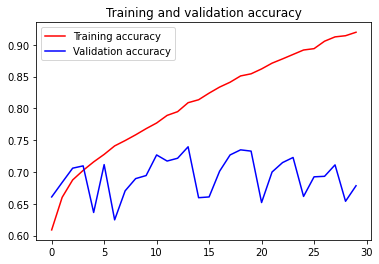

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()